In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder 

In [30]:
data = loadmat('/home/teemo/ML/data/ex4data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [31]:
X = data['X']
y = data['y']
X.shape,y.shape

((5000, 400), (5000, 1))

In [32]:
weight = loadmat('/home/teemo/ML/data/ex4weights.mat')
theta1,theta2 = weight['Theta1'],weight['Theta2']
theta1.shape,theta2.shape

((25, 401), (10, 26))

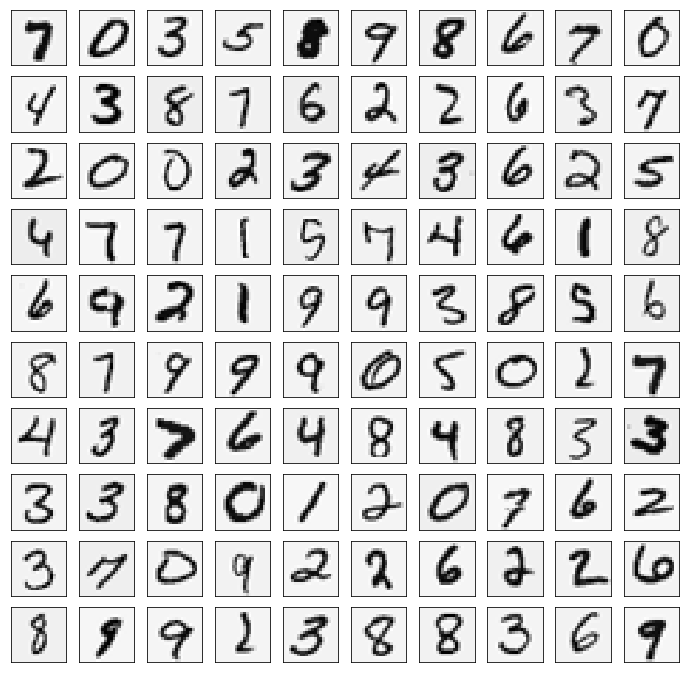

In [33]:
import matplotlib


sample_idx = np.random.choice(np.arange(data['X'].shape[0]),100)
sample_images = data['X'][sample_idx,:]
fig,ax_array = plt.subplots(nrows=10,ncols=10,sharey=True,sharex=True,figsize=(12,12))
for r in range(10):
    for c in range(10):
        ax_array[r,c].matshow(np.array(sample_images[10 * r + c].reshape((20,20))).T,cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

In [34]:
#向前传播和代价函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [35]:
#向前传播函数
def forward_propagate(X,theta1,theta2):
    m = X.shape[0]
    
    a1 = np.insert(X,0,values=np.ones(m),axis=1)
    z2 = a1 * theta1.T
    a2 = np.insert(sigmoid(z2),0,values=np.ones(m),axis=1)
    z3 = a2 * theta2.T
    h = sigmoid(z3)
    
    return a1,z2,a2,z3,h

In [36]:
def cost(theta1,theta2,input_size,hidden_size,num_labels,X,y,learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    a1,z2,a2,z3,h = forward_propagate(X,theta1,theta2)
    
    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:],np.log(h[i,:]))
        second_term = np.multiply((1-y[i,:]),np.log(1-h[i,:]))
        J += np.sum(first_term - second_term)
    J = J/m
    return J

In [37]:
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)
y_onehot


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [38]:
#验证一下
y[0],y_onehot[0,:]
y_onehot.shape

(5000, 10)

In [39]:
#初始化设置
input_size = 400
hidden_size = 25
num_labels = 10
learning_rate = 1

In [40]:
cost(theta1,theta2,input_size,hidden_size,num_labels,X,y_onehot,learning_rate)

0.2876291651613188

In [41]:
#正则化代价函数
def costReg(theta1,theta2,input_size,hidden_size,num_labels,X,y,learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    a1,z2,a2,z3,h = forward_propagate(X,theta1,theta2)
    
    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:],np.log(h[i,:]))
        second_term = np.multiply((1-y[i,:]),np.log(1-h[i,:]))
        J += np.sum(first_term - second_term)
    J = J/m
    
    J += (float(learning_rate) / (2*m)) * (np.sum(np.power(theta1[:,1:],2))+np.sum(np.power(theta2[:,1:],2)))
    return J
    

In [42]:
costReg(theta1,theta2,input_size,hidden_size,num_labels,X,y_onehot,learning_rate)

0.38376985909092354

In [43]:
#反向传播
def sigmoid_gradient(z):
    return np.multiply(sigmoid(z),(1-sigmoid(z)))

In [44]:
sigmoid_gradient(0)

0.25

In [45]:
#随机初始
params = (np.random.random(size=hidden_size*(input_size + 1)+num_labels * (hidden_size + 1)) - 0.5)* 0.24
params.shape

(10285,)

In [49]:
#正则化神经网络
def backprop2(params,input_size,hidden_size,num_labels,X,y,learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)],(hidden_size,(input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):],(num_labels,(hidden_size + 1))))
    #返回前馈神经网络值
    a1,z2,a2,z3,h = forward_propagate(X,theta1,theta2)

    J = 0
    delta1 = np.zeros(theta1.shape)
    delta2 = np.zeros(theta2.shape)
    
    #计算损失值
    for i in range(m):
        first_term = np.multiply(-y[i,:],np.log(h[i,:]))
        second_term = np.multiply((1-y[i,:]),np.log(1-h[i,:]))
        J += np.sum(first_term - second_term)
    J = J/m
    
    J += (float(learning_rate) / (2*m)) * (np.sum(np.power(theta1[:,1:],2))+np.sum(np.power(theta2[:,1:],2)))
    
    #反向传播
    for t in range(m):
        a1t = a1[t,:]
        z2t = z2[t,:]
        a2t = a2[t,:]
        ht = h[t,:]
        yt = y[t,:]
        
        d3t = ht - yt
        
        z2t = np.insert(z2t,0,values=np.ones(1))
        d2t = np.multiply((theta2.T * d3t.T).T,sigmoid_gradient(z2t))
        
        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3t.T * a2t
    
    delta1 = delta1 / m
    delta2 = delta2 / m
        
    delta1[:,1:] = delta1[:,1:] + (theta1[:,1:] * learning_rate) / m
    delta2[:,1:] = delta2[:,1:] + (theta2[:,1:] * learning_rate) / m
    
    grad = np.concatenate((np.ravel(delta1),np.ravel(delta2)))
    
    return J,grad
    

In [47]:
def backpropReg(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # reshape the parameter array into parameter matrices for each layer
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    
    # run the feed-forward pass
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # initializations
    J = 0
    delta1 = np.zeros(theta1.shape)  # (25, 401)
    delta2 = np.zeros(theta2.shape)  # (10, 26)
    
    # compute the cost
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    
    # add the cost regularization term
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2)))
    
    # perform backpropagation
    for t in range(m):
        a1t = a1[t,:]  # (1, 401)
        z2t = z2[t,:]  # (1, 25)
        a2t = a2[t,:]  # (1, 26)
        ht = h[t,:]  # (1, 10)
        yt = y[t,:]  # (1, 10)
        
        d3t = ht - yt  # (1, 10)
        
        z2t = np.insert(z2t, 0, values=np.ones(1))  # (1, 26)
        d2t = np.multiply((theta2.T * d3t.T).T, sigmoid_gradient(z2t))  # (1, 26)
        
        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3t.T * a2t
        
    delta1 = delta1 / m
    delta2 = delta2 / m
    
    # add the gradient regularization term
    delta1[:,1:] = delta1[:,1:] + (theta1[:,1:] * learning_rate) / m
    delta2[:,1:] = delta2[:,1:] + (theta2[:,1:] * learning_rate) / m
    
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2)))
    
    return J, grad

In [50]:
from scipy.optimize import minimize

fmin = minimize(fun=backprop2, x0=(params), args=(input_size, hidden_size, num_labels, X, y_onehot, learning_rate), 
                method='TNC', jac=True, options={'maxiter': 250})


In [51]:
fmin

     fun: 0.33124672826983714
     jac: array([ 1.93615210e-06,  1.80545697e-06, -1.67994886e-06, ...,
        3.24912830e-04,  1.77004342e-04,  1.46540348e-04])
 message: 'Max. number of function evaluations reached'
    nfev: 250
     nit: 21
  status: 3
 success: False
       x: array([-0.66085654,  0.00902728, -0.00839974, ..., -0.79773908,
        1.1002983 , -2.45853855])

In [52]:
X = np.matrix(X)
thetafinal1 = np.matrix(np.reshape(fmin.x[:hidden_size * (input_size + 1)],(hidden_size,(input_size + 1))))
thetafinal2 = np.matrix(np.reshape(fmin.x[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

In [54]:
a1,z2,a2,z3,h = forward_propagate(X,thetafinal1,thetafinal2)
y_pred = np.array(np.argmax(h,axis=1) + 1)
y_pred

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]])

In [55]:
from sklearn.metrics import classification_report


print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       500
           2       1.00      0.99      0.99       500
           3       1.00      0.99      0.99       500
           4       1.00      0.99      0.99       500
           5       1.00      1.00      1.00       500
           6       1.00      1.00      1.00       500
           7       0.99      1.00      0.99       500
           8       0.99      1.00      1.00       500
           9       0.99      0.98      0.99       500
          10       0.99      1.00      1.00       500

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [56]:
#可视化隐藏层
hidden_layer = thetafinal1[:,1:]
hidden_layer.shape

(25, 400)

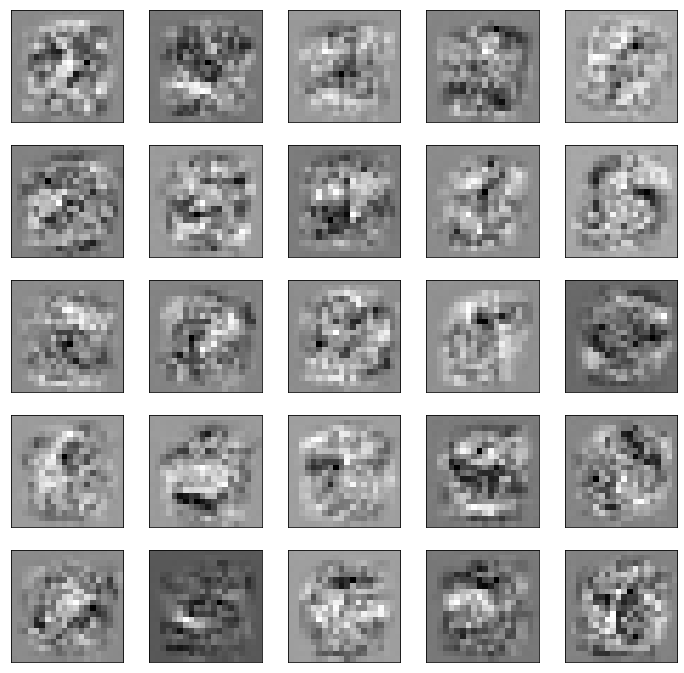

In [58]:
fig,ax_array = plt.subplots(nrows=5,ncols=5,sharex=True,sharey=True,figsize=(12,12))
for r in range(5):
    for c in range(5):
        ax_array[r,c].matshow(np.array(hidden_layer[5 * r + c].reshape((20,20))).T,cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))